In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
df = pd.read_csv('ooi-ce04osps-sf01b-2a-ctdpfa107_4ea2_fbbf_5544.csv')
print(df.shape)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(6045667, 4)


In [12]:
df.columns

Index(['time', 'sea_water_temperature_profiler_depth_enabled',
       'sea_water_temperature_profiler_depth_enabled_qc_agg', 'z'],
      dtype='object')

In [171]:
data = df[['time','sea_water_temperature_profiler_depth_enabled','z']][1:-1]
data = data.rename(columns={"sea_water_temperature_profiler_depth_enabled": "temp"})
data['temp'] = data['temp'].astype(float)
data['time'] = pd.to_datetime(data['time'])
data = data.set_index('time')

In [173]:
data_10m = data[data.z == -10]
data_10m_daily = data_10m.resample('d').mean()
data_10m_daily = data_10m_daily.rename(columns={"temp": "temp_10m"})
data_10m_daily_z = (data_10m_daily['temp_10m']-data_10m_daily['temp_10m'].mean())/data_10m_daily['temp_10m'].std()

In [174]:
data_50m = data[data.z == -50]
data_50m_daily = data_50m.resample('d').mean()
data_50m_daily = data_50m_daily.rename(columns={"temp": "temp_50m"})
data_50m_daily_z = (data_50m_daily['temp_50m']-data_50m_daily['temp_50m'].mean())/data_50m_daily['temp_50m'].std()

In [172]:
data_100m = data[data.z == -100]
data_100m_daily = data_100m.resample('d').mean()
data_100m_daily = data_100m_daily.rename(columns={"temp": "temp_100m"})
data_100m_daily_z = (data_100m_daily['temp_100m']-data_100m_daily['temp_100m'].mean())/data_100m_daily['temp_100m'].std()

Text(0.5, 1.0, 'daily average')

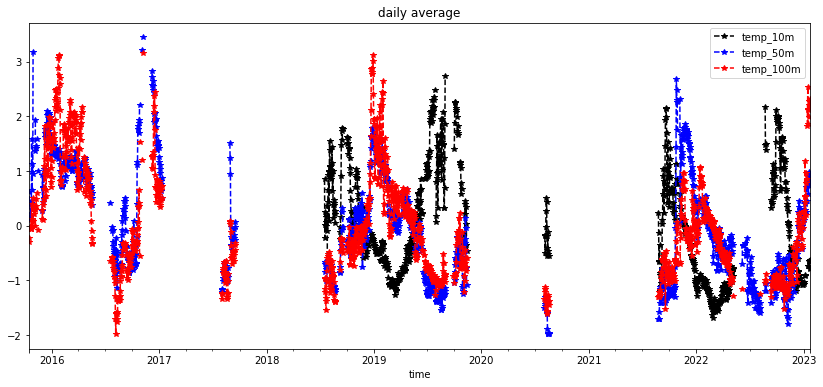

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))
data_10m_daily_z.plot(marker='*',color='k',linestyle='--',ax=ax)
data_50m_daily_z.plot(marker='*',color='b',linestyle='--',ax=ax)
data_100m_daily_z.plot(marker='*',color='r',linestyle='--',ax=ax)
plt.legend()
plt.title('daily average')

Text(0, 0.5, 'Time')

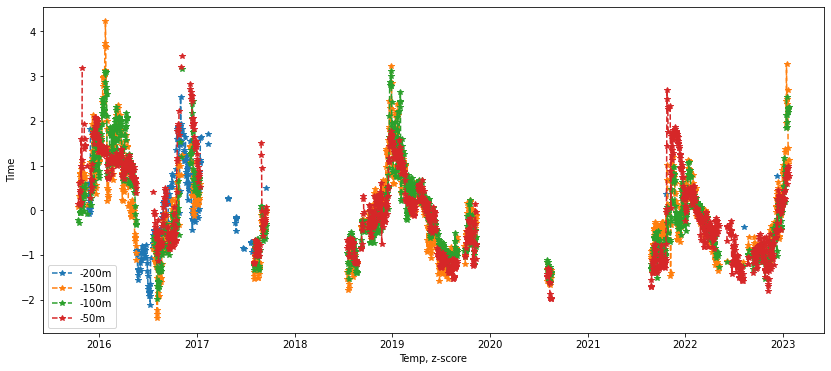

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))

for d in np.arange(-200,0,50):
    data_sel = data[data.z == d]
    data_sel_daily = data_sel.resample('d').mean()
    data_sel_daily_z = (data_sel_daily['temp']-data_sel_daily['temp'].mean())/data_sel_daily['temp'].std()
    ax = plt.plot(data_sel_daily_z,marker='*',linestyle='--',label=str(d)+'m')
plt.legend()
plt.xlabel('Temp, z-score')
plt.ylabel('Time')